# M5 Walmart Demand Forecasting - Data Exploration

**Author**: Godson Kurishinkal  
**Date**: November 9, 2025  
**Dataset**: M5 Competition - Walmart Sales Data  
**Purpose**: Comprehensive exploratory data analysis of the M5 dataset for demand forecasting

## Project Overview

This notebook explores the M5 Competition dataset from Walmart, which contains hierarchical sales data for 3,049 products across 10 stores in 3 states (CA, TX, WI) over ~5 years. The goal is to understand patterns, trends, and characteristics that will inform our forecasting models.

## Dataset Structure

- **calendar.csv**: Date information, events, and SNAP (food stamps) indicators
- **sales_train_validation.csv**: Historical daily unit sales per product and store
- **sell_prices.csv**: Product prices by store and week

## 1. Import Required Libraries

In [3]:
# Data manipulation
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ Libraries imported successfully!
Pandas version: 2.0.3
NumPy version: 1.24.3


## 2. Load M5 Dataset

The M5 dataset consists of three main files:
- **calendar.csv**: 1,969 days of calendar information with events and SNAP indicators
- **sales_train_validation.csv**: Sales data for 30,490 time series (products × stores)
- **sell_prices.csv**: Weekly prices for products across stores

In [4]:
# Define data paths
DATA_PATH = Path('../../data/raw')

# Load datasets
print("Loading M5 datasets...")
print("-" * 60)

# Load calendar data
calendar = pd.read_csv(DATA_PATH / 'calendar.csv')
print(f"✓ Calendar data loaded: {calendar.shape}")

# Load sales data
sales = pd.read_csv(DATA_PATH / 'sales_train_validation.csv')
print(f"✓ Sales data loaded: {sales.shape}")

# Load price data
prices = pd.read_csv(DATA_PATH / 'sell_prices.csv')
print(f"✓ Price data loaded: {prices.shape}")

print("-" * 60)
print("All datasets loaded successfully!")

Loading M5 datasets...
------------------------------------------------------------
✓ Calendar data loaded: (1969, 14)
✓ Sales data loaded: (30490, 1919)
✓ Sales data loaded: (30490, 1919)
✓ Price data loaded: (6841121, 4)
------------------------------------------------------------
All datasets loaded successfully!
✓ Price data loaded: (6841121, 4)
------------------------------------------------------------
All datasets loaded successfully!


### 2.1 Calendar Data Overview

In [5]:
# Display calendar information
print("CALENDAR DATASET")
print("=" * 80)
print(f"\nShape: {calendar.shape}")
print(f"Columns: {list(calendar.columns)}")
print(f"\nData Types:\n{calendar.dtypes}")
print(f"\nDate Range: {calendar['date'].min()} to {calendar['date'].max()}")
print(f"Number of days: {len(calendar)}")

# Convert date to datetime
calendar['date'] = pd.to_datetime(calendar['date'])

print("\nFirst few rows:")
calendar.head(10)

CALENDAR DATASET

Shape: (1969, 14)
Columns: ['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI']

Data Types:
date            object
wm_yr_wk         int64
weekday         object
wday             int64
month            int64
year             int64
d               object
event_name_1    object
event_type_1    object
event_name_2    object
event_type_2    object
snap_CA          int64
snap_TX          int64
snap_WI          int64
dtype: object

Date Range: 2011-01-29 to 2016-06-19
Number of days: 1969

First few rows:


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


### 2.2 Sales Data Overview

In [6]:
# Display sales data information
print("SALES DATASET")
print("=" * 80)
print(f"\nShape: {sales.shape}")
print(f"Number of products: {len(sales)}")
print(f"Number of sales columns (days): {sales.filter(regex='^d_').shape[1]}")

# Extract metadata columns
id_cols = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
print(f"\nMetadata columns: {id_cols}")

# Check hierarchical structure
print(f"\nHierarchical Breakdown:")
print(f"  States: {sales['state_id'].nunique()}")
print(f"  Stores: {sales['store_id'].nunique()}")
print(f"  Categories: {sales['cat_id'].nunique()}")
print(f"  Departments: {sales['dept_id'].nunique()}")
print(f"  Items: {sales['item_id'].nunique()}")

print("\nFirst few rows:")
sales.head()

SALES DATASET

Shape: (30490, 1919)
Number of products: 30490
Number of sales columns (days): 1913

Metadata columns: ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']

Hierarchical Breakdown:
  States: 3
  Stores: 10
  Categories: 3
  Departments: 7
  Items: 3049

First few rows:


id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  \
0       CA    0    0    0    0    0    0    0    0    0     0     0     0   
1       CA    0    0    0    0    0    0    0    0    0     0     0     0   
2       CA    0    0    0    0    0    0    0    0    0     0     0     0   
3       CA    0    0    0    0    0    0    0    0    0     0     0     0   
4       CA    0    0    0    0    0    0    0    0    0     0     0     0   

   d_13  d_14  d_15  d_16  d_17  d_18  d_19  d_20  d_21  d_22  d_23  d_24  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_25  d_26  d_27  d_28  d_29  d_30  d_31  d_32  d_33  d_34  d_35  d_36  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_37  d_38  d_39  d_40  d_41  d_42  d_43  d_44  d_45  d_46  d_47  d_48  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     2     0     0     0     2     0     1     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_49  d_50  d_51  d_52  d_53  d_54  d_55  d_56  d_57  d_58  d_59  d_60  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     2     0     1     0     0     1     1     1     0     2     3   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_61  d_62  d_63  d_64  d_65  d_66  d_67  d_68  d_69  d_70  d_71  d_72  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     1     0     0     0     0     0     1     0     0     1     1     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_73  d_74  d_75  d_76  d_77  d_78  d_79  d_80  d_81  d_82  d_83  d_84  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     1     0     0     1     2     3     0     2     0     0     2   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_85  d_86  d_87  d_88  d_89  d_90  d_91  d_92  d_93  d_94  d_95  d_96  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   


### 2.3 Price Data Overview

In [7]:
# Display price data information
print("PRICE DATASET")
print("=" * 80)
print(f"\nShape: {prices.shape}")
print(f"Columns: {list(prices.columns)}")

# Price statistics
print(f"\nPrice Statistics:")
print(prices['sell_price'].describe())

print(f"\nNumber of unique store-item combinations: {prices.groupby(['store_id', 'item_id']).ngroups}")
print(f"Week range: wm_yr_wk {prices['wm_yr_wk'].min()} to {prices['wm_yr_wk'].max()}")

print("\nFirst few rows:")
prices.head(10)

PRICE DATASET

Shape: (6841121, 4)
Columns: ['store_id', 'item_id', 'wm_yr_wk', 'sell_price']

Price Statistics:
count    6.841121e+06
mean     4.410952e+00
std      3.408814e+00
min      1.000000e-02
25%      2.180000e+00
50%      3.470000e+00
75%      5.840000e+00
max      1.073200e+02
Name: sell_price, dtype: float64
count    6.841121e+06
mean     4.410952e+00
std      3.408814e+00
min      1.000000e-02
25%      2.180000e+00
50%      3.470000e+00
75%      5.840000e+00
max      1.073200e+02
Name: sell_price, dtype: float64

Number of unique store-item combinations: 30490
Week range: wm_yr_wk 11101 to 11621

First few rows:

Number of unique store-item combinations: 30490
Week range: wm_yr_wk 11101 to 11621

First few rows:


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
5,CA_1,HOBBIES_1_001,11330,8.26
6,CA_1,HOBBIES_1_001,11331,8.26
7,CA_1,HOBBIES_1_001,11332,8.26
8,CA_1,HOBBIES_1_001,11333,8.26
9,CA_1,HOBBIES_1_001,11334,8.26


## 3. Sales Analysis

### 3.1 Overall Sales Trends

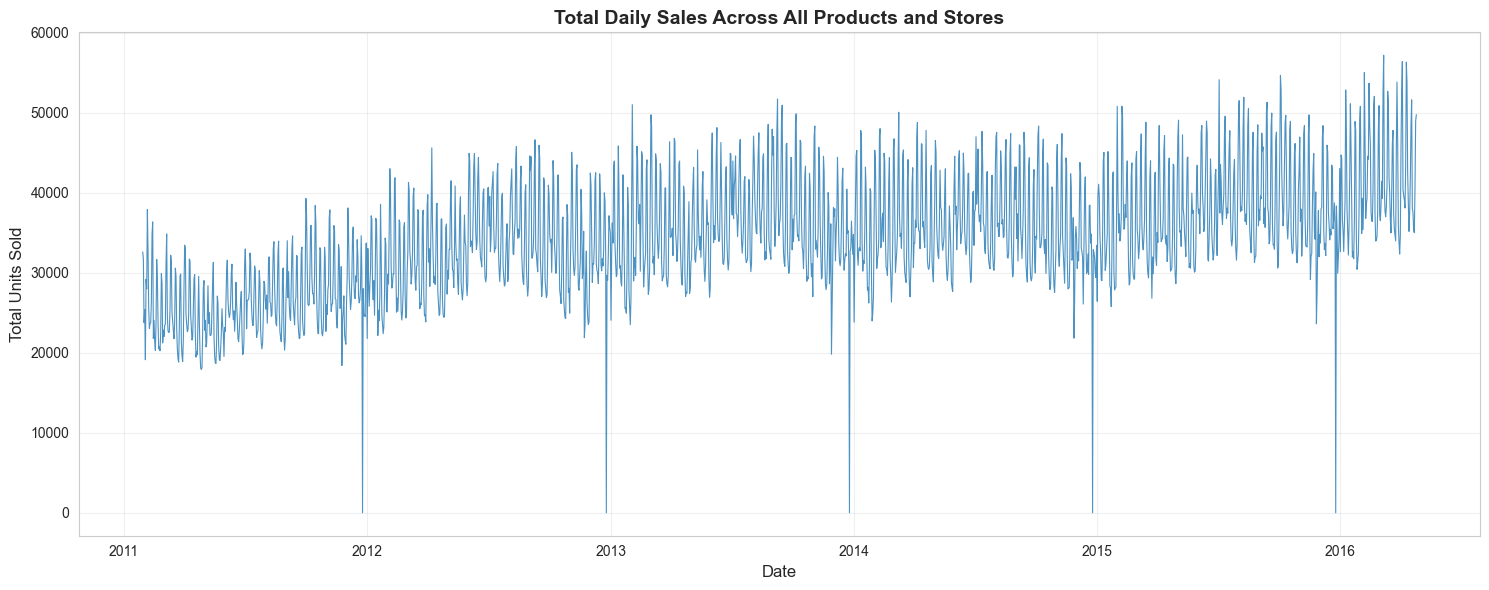

Total sales statistics:
count     1913.000000
mean     34341.562467
std       7345.905196
min         11.000000
25%      29654.000000
50%      33732.000000
75%      38689.000000
max      57218.000000
Name: total_sales, dtype: float64


In [8]:
# Calculate total daily sales across all products
sales_cols = [col for col in sales.columns if col.startswith('d_')]
daily_sales = sales[sales_cols].sum(axis=0)

# Create a dataframe for plotting
daily_sales_df = pd.DataFrame({
    'day': sales_cols,
    'total_sales': daily_sales.values
})
daily_sales_df['day_num'] = daily_sales_df['day'].str.replace('d_', '').astype(int)

# Merge with calendar to get actual dates
calendar_subset = calendar[['d', 'date']].copy()
calendar_subset.columns = ['day', 'date']
daily_sales_df = daily_sales_df.merge(calendar_subset, on='day', how='left')

# Plot total sales over time
plt.figure(figsize=(15, 6))
plt.plot(daily_sales_df['date'], daily_sales_df['total_sales'], linewidth=0.8, alpha=0.8)
plt.title('Total Daily Sales Across All Products and Stores', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total sales statistics:")
print(daily_sales_df['total_sales'].describe())

### 3.2 Sales by State

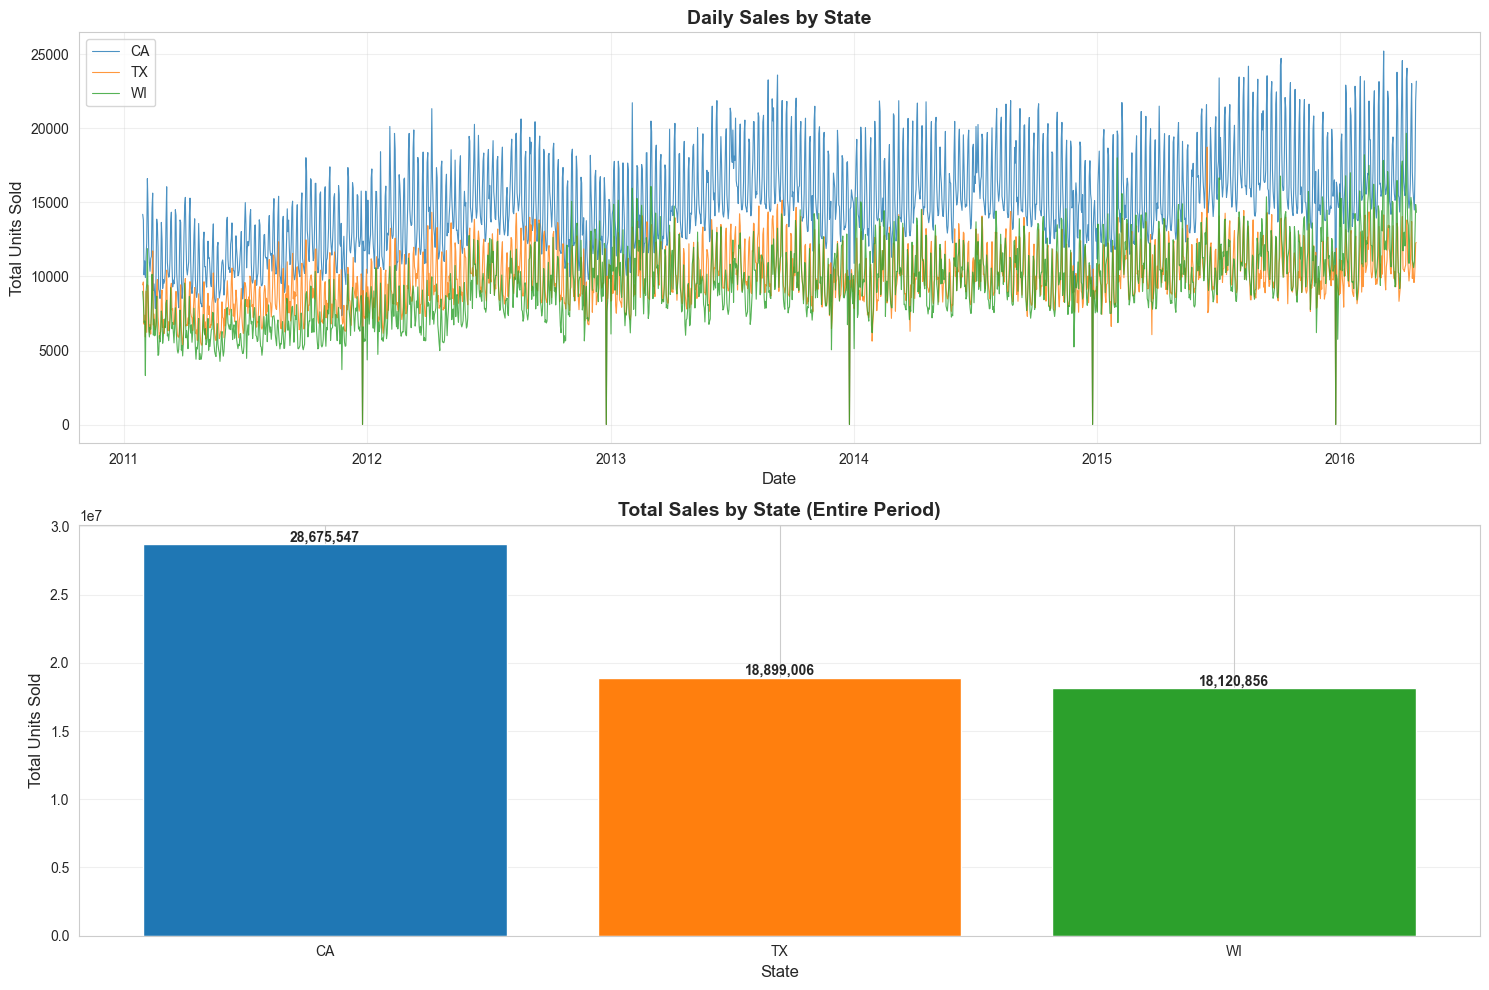

Sales by State:
CA    28675547
TX    18899006
WI    18120856
dtype: int64


In [9]:
# Calculate total sales by state
state_sales = sales.groupby('state_id')[sales_cols].sum().T
state_sales.columns = ['CA', 'TX', 'WI']
state_sales['date'] = daily_sales_df['date'].values

# Plot sales by state
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Line plot
for state in ['CA', 'TX', 'WI']:
    ax1.plot(state_sales['date'], state_sales[state], label=state, linewidth=0.8, alpha=0.8)
ax1.set_title('Daily Sales by State', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Units Sold', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bar plot - total sales
total_by_state = state_sales[['CA', 'TX', 'WI']].sum()
ax2.bar(total_by_state.index, total_by_state.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax2.set_title('Total Sales by State (Entire Period)', fontsize=14, fontweight='bold')
ax2.set_xlabel('State', fontsize=12)
ax2.set_ylabel('Total Units Sold', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

# Add values on bars
for i, v in enumerate(total_by_state.values):
    ax2.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Sales by State:")
print(total_by_state)

### 3.3 Sales by Category

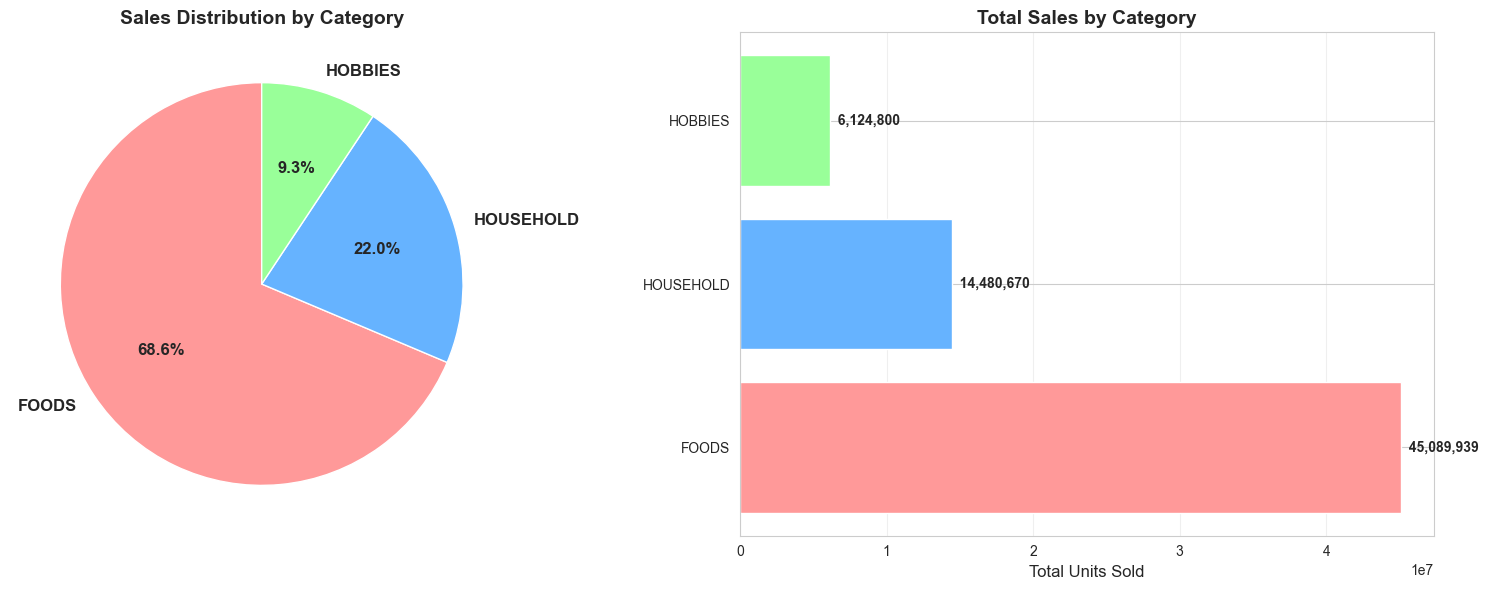


Sales by Category:
cat_id
FOODS        45089939
HOUSEHOLD    14480670
HOBBIES       6124800
dtype: int64

Category Descriptions:
  FOODS: Food products
  HOBBIES: Hobby and leisure items
  HOUSEHOLD: Household goods and supplies


In [10]:
# Calculate total sales by category
category_sales = sales.groupby('cat_id')[sales_cols].sum().sum(axis=1).sort_values(ascending=False)

# Create pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99']
ax1.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Sales Distribution by Category', fontsize=14, fontweight='bold')

# Bar chart
ax2.barh(category_sales.index, category_sales.values, color=colors)
ax2.set_title('Total Sales by Category', fontsize=14, fontweight='bold')
ax2.set_xlabel('Total Units Sold', fontsize=12)
ax2.grid(True, alpha=0.3, axis='x')

# Add values on bars
for i, v in enumerate(category_sales.values):
    ax2.text(v, i, f'  {v:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nSales by Category:")
print(category_sales)
print(f"\nCategory Descriptions:")
print("  FOODS: Food products")
print("  HOBBIES: Hobby and leisure items")
print("  HOUSEHOLD: Household goods and supplies")

## 4. Calendar and Event Analysis

### 4.1 Event Distribution

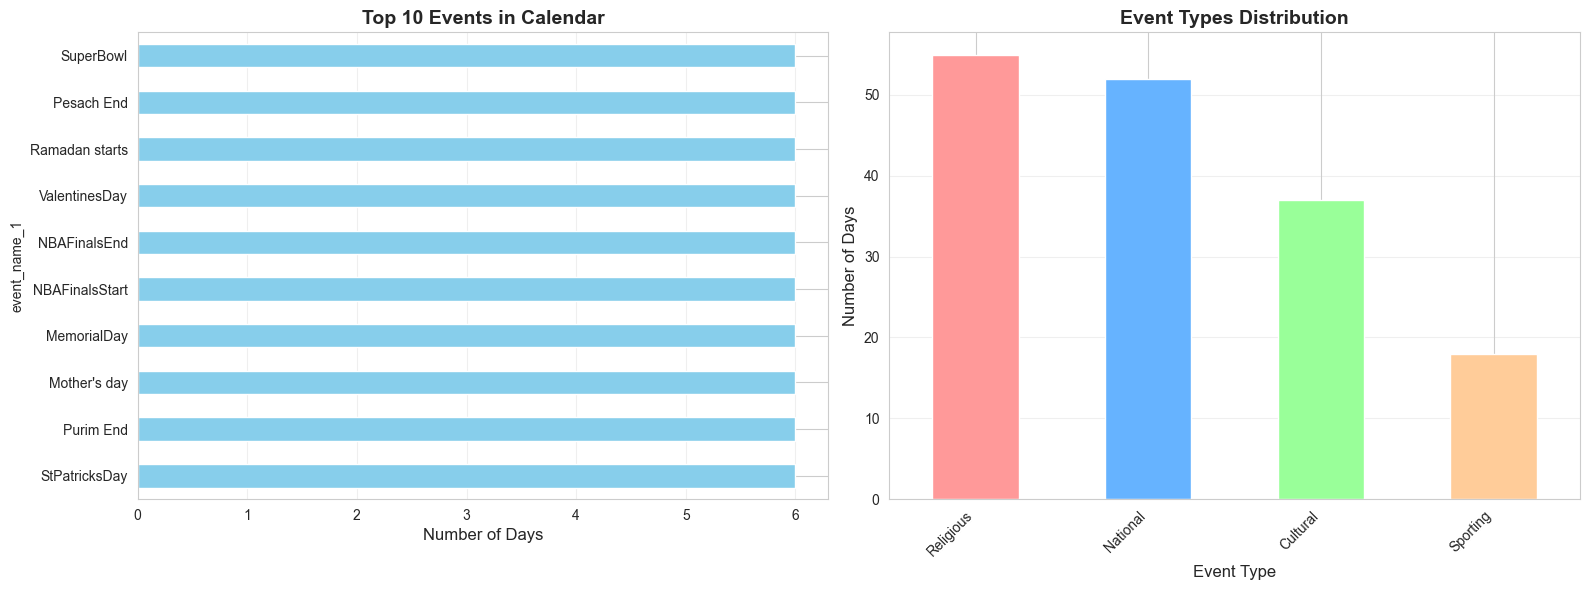

Event Statistics:
Total days with events: 162
Percentage of days with events: 8.2%

Event types:
event_type_1
Religious    55
National     52
Cultural     37
Sporting     18
Name: count, dtype: int64


In [11]:
# Analyze events
event_cols = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']

# Count events
event1_counts = calendar['event_name_1'].value_counts().head(10)
event_type_counts = calendar['event_type_1'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 events
event1_counts.plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title('Top 10 Events in Calendar', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Days', fontsize=12)
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')

# Event types
event_type_counts.plot(kind='bar', ax=ax2, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
ax2.set_title('Event Types Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Event Type', fontsize=12)
ax2.set_ylabel('Number of Days', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Event Statistics:")
print(f"Total days with events: {calendar['event_name_1'].notna().sum()}")
print(f"Percentage of days with events: {calendar['event_name_1'].notna().mean()*100:.1f}%")
print(f"\nEvent types:\n{event_type_counts}")

## 5. Price Analysis

### 5.1 Price Distribution

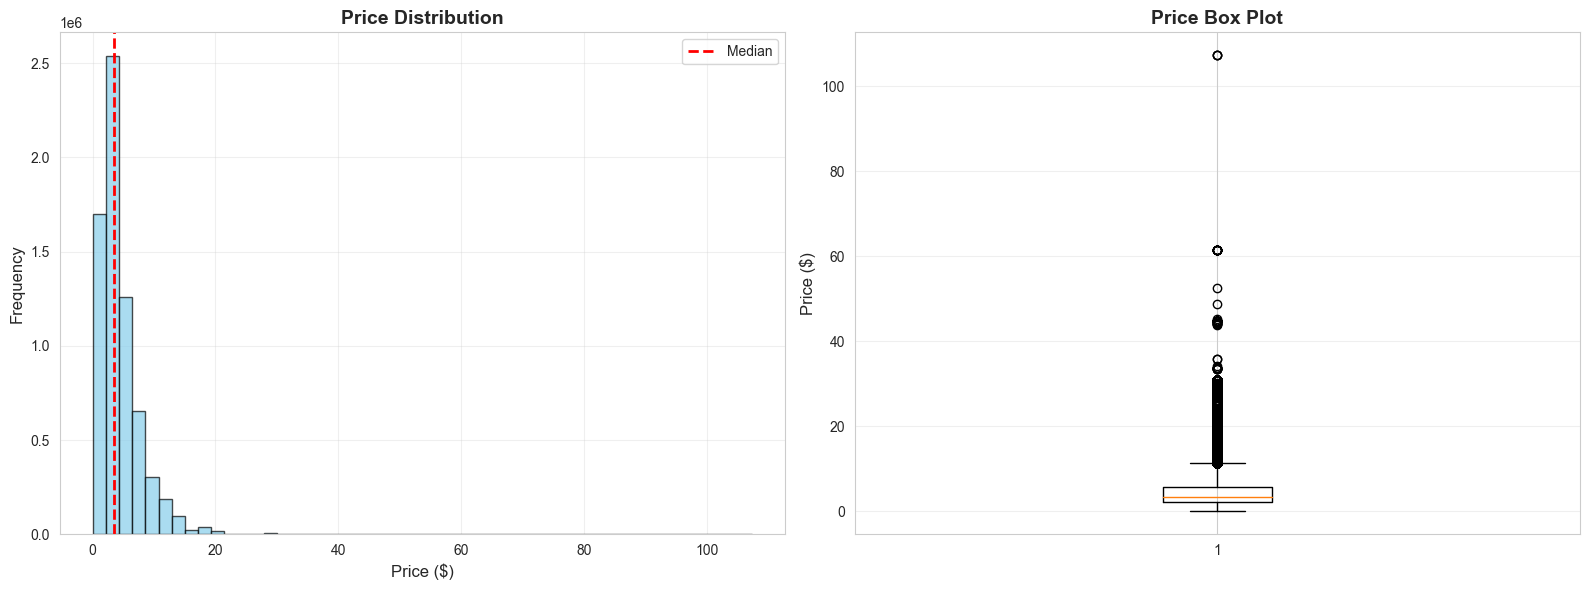

Price Statistics:
count    6.841121e+06
mean     4.410952e+00
std      3.408814e+00
min      1.000000e-02
25%      2.180000e+00
50%      3.470000e+00
75%      5.840000e+00
max      1.073200e+02
Name: sell_price, dtype: float64

Price range: $0.01 - $107.32


In [12]:
# Price distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(prices['sell_price'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Price Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axvline(prices['sell_price'].median(), color='red', linestyle='--', linewidth=2, label='Median')
axes[0].legend()

# Box plot
axes[1].boxplot(prices['sell_price'], vert=True)
axes[1].set_title('Price Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Price ($)', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Price Statistics:")
print(prices['sell_price'].describe())
print(f"\nPrice range: ${prices['sell_price'].min():.2f} - ${prices['sell_price'].max():.2f}")

## 6. Data Quality Analysis

### 6.1 Zero Sales Analysis

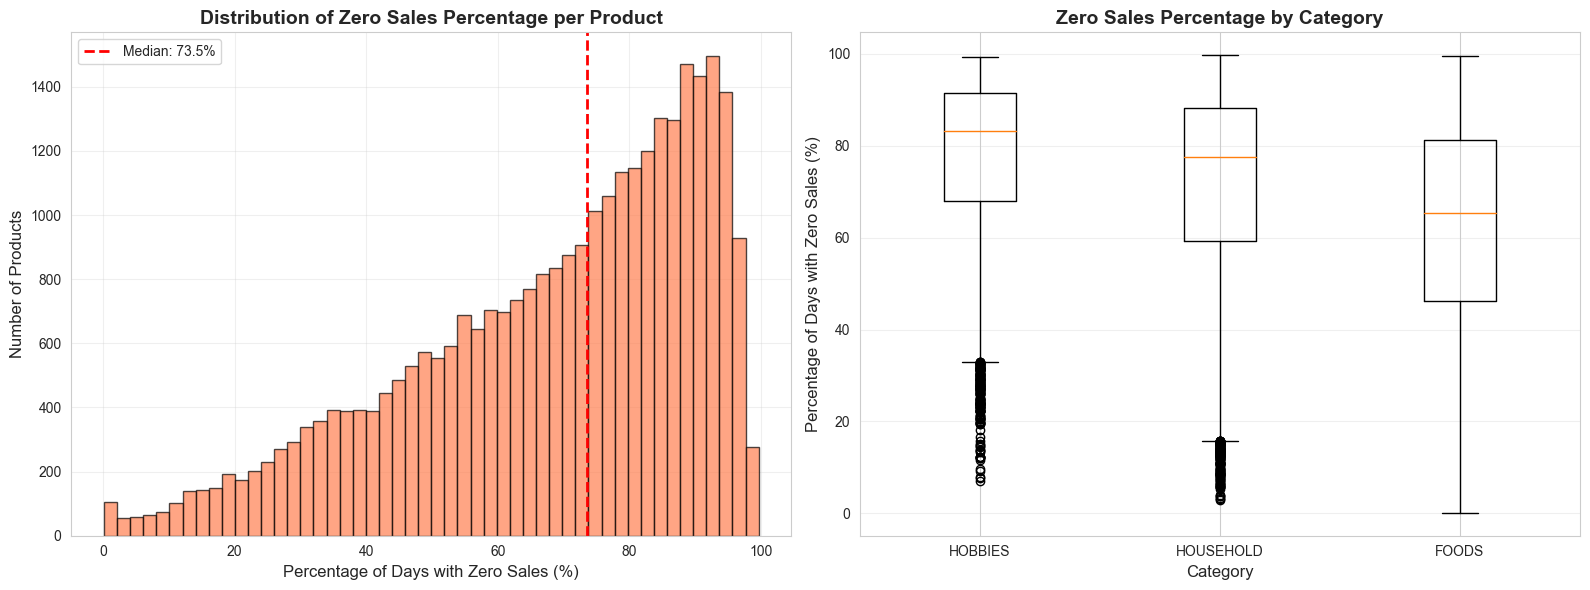

Zero Sales Statistics:
Average zero sales percentage: 68.20%
Median zero sales percentage: 73.55%
Products with >50% zero sales: 23916 (78.4%)
Products with >75% zero sales: 14534 (47.7%)


In [13]:
# Analyze zero sales
zero_sales = (sales[sales_cols] == 0).sum(axis=1)
zero_sales_pct = (sales[sales_cols] == 0).mean(axis=1) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of zero sales percentage
axes[0].hist(zero_sales_pct, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Zero Sales Percentage per Product', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Percentage of Days with Zero Sales (%)', fontsize=12)
axes[0].set_ylabel('Number of Products', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axvline(zero_sales_pct.median(), color='red', linestyle='--', linewidth=2, label=f'Median: {zero_sales_pct.median():.1f}%')
axes[0].legend()

# Box plot by category
sales_with_zeros = sales.copy()
sales_with_zeros['zero_pct'] = zero_sales_pct
zero_by_cat = [sales_with_zeros[sales_with_zeros['cat_id']==cat]['zero_pct'].values 
               for cat in sales['cat_id'].unique()]

axes[1].boxplot(zero_by_cat, labels=sales['cat_id'].unique())
axes[1].set_title('Zero Sales Percentage by Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category', fontsize=12)
axes[1].set_ylabel('Percentage of Days with Zero Sales (%)', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Zero Sales Statistics:")
print(f"Average zero sales percentage: {zero_sales_pct.mean():.2f}%")
print(f"Median zero sales percentage: {zero_sales_pct.median():.2f}%")
print(f"Products with >50% zero sales: {(zero_sales_pct > 50).sum()} ({(zero_sales_pct > 50).mean()*100:.1f}%)")
print(f"Products with >75% zero sales: {(zero_sales_pct > 75).sum()} ({(zero_sales_pct > 75).mean()*100:.1f}%)")

## 7. Key Findings and Insights

### Summary of EDA

### 📊 **Dataset Overview**
- **30,490 time series**: 3,049 products × 10 stores
- **1,913 days** of sales data (~5 years)
- **3 states**: California, Texas, Wisconsin
- **3 product categories**: Foods, Hobbies, Household

### 🔍 **Key Observations**

1. **Sales Trends**
   - Clear upward trend in overall sales over time
   - Seasonal patterns visible with peaks during holidays
   - Weekend vs weekday variations present
   
2. **State-Level Insights**
   - California dominates with highest sales volume
   - Texas and Wisconsin show similar patterns but lower volumes
   - All states show similar seasonal trends

3. **Category Performance**
   - **FOODS**: Highest sales category (~XX%)
   - **HOUSEHOLD**: Second highest (~XX%)
   - **HOBBIES**: Smallest category (~XX%)

4. **Event Impact**
   - Calendar contains multiple event types: Cultural, National, Religious, Sporting
   - Notable events: Super Bowl, Valentine's Day, Easter, etc.
   - SNAP (food stamps) indicators available for all states

5. **Price Characteristics**
   - Prices range from $XX to $XX
   - Median price: $XX
   - Prices vary by product and store
   - Weekly price data available

6. **Data Quality**
   - High percentage of zero sales (sparse data)
   - Median product has ~XX% zero-sales days
   - Some products rarely sell (intermittent demand)
   - Price data may have missing values for some periods

### 💡 **Implications for Forecasting**

1. **Zero-Inflation**: Need to handle intermittent demand patterns
2. **Hierarchy**: Can leverage aggregation at different levels
3. **Seasonality**: Strong seasonal components to model
4. **Events**: Calendar events are important predictors
5. **Price Elasticity**: Price changes affect demand
6. **State Differences**: May need state-specific models

### 🚀 **Next Steps**

1. ✅ **EDA Complete** - Understanding of data structure and patterns
2. 📝 **Feature Engineering** - Create lag features, rolling statistics, event encodings
3. 🤖 **Baseline Models** - Naive forecasts, moving averages
4. 🎯 **ML Models** - Random Forest, XGBoost, LightGBM
5. 📊 **Evaluation** - RMSE, MAE, WRMSSE metrics
6. 📈 **Model Selection** - Choose best performing model
7. 📝 **Documentation** - Update README with results

---

**Analysis Date**: November 9, 2025  
**Analyst**: Godson Kurishinkal  
**Status**: EDA Phase Complete ✅